# Python Assignment 2

⏱⏱⏱**Due: 10/15/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

(150 points total)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)


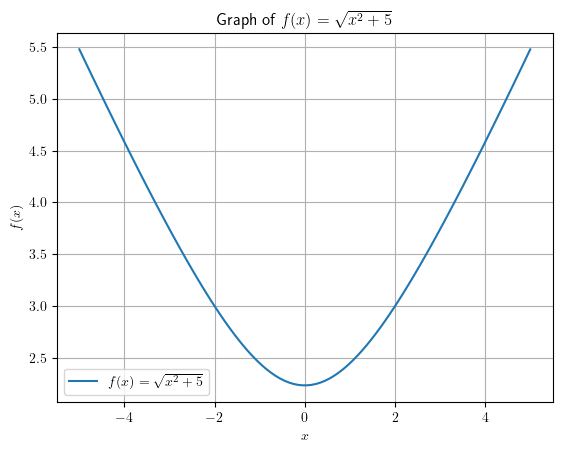

In [76]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)

# Define the function f(x) = sqrt(x^2 + 5)
def f(x: float) -> float:
    return ((x ** 2) + 5) ** (1/2)

# Plot the function f(x), np.linspace might be helpful.
X = np.linspace(-5, 5, 100)
y = [f(n) for n in X]

plt.plot(X, y, label = r'$f(x) = \sqrt{x^2 + 5}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$') 
plt.title(r'Graph of $f(x) = \sqrt{x^2 + 5}$') 
plt.grid(True)
plt.legend()

### Derivative of f(x):
$$ f'(x) = \frac{d}{dx}(\sqrt{x^2 + 5}) = \frac{x}{\sqrt{x^2 + 5}}

### Gradient Descent Algorithm:
$$ x_{k+1} = x_{k} - \alpha_{k} \nabla f(x_{k}); \quad k = 1, 2, 3, ...$$

x_T: 4.556057158298213e-13


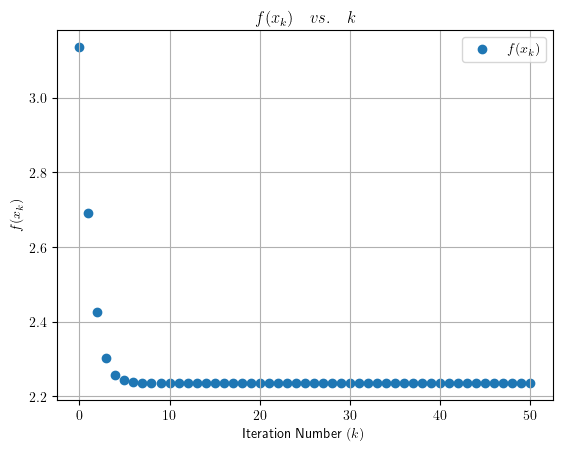

In [77]:
# Define the derivative of the function f(x), for gradient descent
def fp(x: float) -> float:
    return x / (((x**2) + 5) ** (1/2))

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def gradient_descent(x_0: float, 
                     step_size: float, 
                     num_iterations: int) -> list:
    
    # make a list to store the x_k values, first element will be x_0
    x_k_list = []
    x_k_list.append(x_0)

    # for each iteration, take current x value and subtract 
    # (step size) * (gradient)
    for i in range(num_iterations): 
        x_k = x_k_list[-1]
        x_k_1 = x_k - (step_size * fp(x_k))
        x_k_list.append(x_k_1)

    return x_k_list 

# set up/assign initial values

# initial value x_0 = (last digit of ID) / 5 + 1
x_0 = (6 / 5) + 1

num_iterations = 50

step_size = 1

# Run gradient descent by calling the function
x_vals = gradient_descent(x_0, step_size, num_iterations)

# report x_T by printing out the value
x_T = x_vals[-1]
print(f'x_T: {x_T}')
# print(x_vals)

# Plot the f(x_k) values vs. iteration number
plt.scatter(range(0, len(x_vals)), [f(x_k) for x_k in x_vals], 
            label = r'$f(x_k)$')
plt.xlabel(r'Iteration Number $(k)$')
plt.ylabel(r'$f(x_k)$') 
plt.title(r'$f(x_k) \quad vs. \quad k$') 
plt.grid(True)
plt.legend()

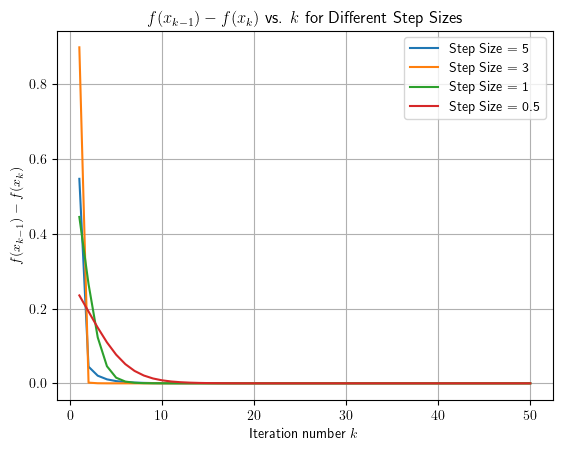

In [78]:
# create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]

# initialize a list to store the results from different step sizes
x_vals_list = []

# loop through the step sizes and perform GD and record results
for step_size in step_sizes:
    xk_list = gradient_descent(x_0, step_size, num_iterations)
    x_vals_list.append(xk_list)

# plot multiple curves in a single graph

# including x_0 as the 0th iteration, there are 51 total x_k terms
# for each step size, make a list containing f(x_k-1) - f(x_k) terms 
#    for k = 1, ... , 50
diff_list = []
for x_list in x_vals_list:
    diffs = [f(x_list[k - 1]) - f(x_list[k]) for k in range(1, len(x_list))]
    diff_list.append(diffs)

num_diffs = len(diff_list[0])

# diff_list contains the f(x_k-1) - f(x_k) terms for each step size in 
# the order: 5, 3, 1, 0.5
plt.title(r'$f(x_{k-1}) - f(x_k)$ vs. $k$ for Different Step Sizes')
plt.grid(True)
plt.xlabel(r'Iteration number $k$')
plt.ylabel(r'$f(x_{k-1}) - f(x_k)$')
for i in range(len(step_sizes)):
    plt.plot(range(1, num_diffs + 1), diff_list[i], 
             label = f'Step Size = {step_sizes[i]}')
plt.legend()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



### Normal Equation:
$$ \Theta = (X^TX)^{-1}X^Ty $$

$$
\begin{align*}
  \text{where:} \\
  \Theta &= \text{Optimal parameters}, \\ 
  X &= \text{Input features}, \\
  y &= \text{Output values}
\end{align*}
$$


### Simple Linear Regression:

$$
y_i = wx_{i} + b
$$

$
\text{where, for the} \ i^{th} \ \text{observation:}\\
$

$$
\begin{align}
    y_{i} &= \text{dependent variable} \notag \\
    x_{i} &= \text{independent variable} \notag \\
    w &= \text{slope / weight} \notag \\ 
    b &= \text{y-intercept (constant)} \notag \\
\end{align} \\
$$


#### For Multiple Dimensions:

$$
\mathbf{y} = \mathbf{Xw}+b
$$

$
\text{where:}
$

$$
\begin{align}
\mathbf{y} &= (n \times 1) \ \text{vector of output values} 
    \begin{bmatrix} 
    y_1 \\ y_2 \\ \vdots \\ y_n
    \end{bmatrix} \notag \\
\mathbf{X} &= (n \times p) \ \text{matrix of input features}
    \begin{bmatrix}
    x_{11}, x_{21}, \dots , x_{p1} \\
    x_{12}, x_{22}, \dots , x_{p2} \\
    \vdots \notag \\
    x_{1n}, x_{2n}, \dots , x_{pn}
    \end{bmatrix} \\
\mathbf{w} &= (p \times 1) \ \text{vector of weights} 
    \begin{bmatrix}
    w_1 \\ w_2 \\ \vdots \\ w_p
    \end{bmatrix} \notag \\
b &= \text{bias term} \notag
\end{align}
$$

C:\Users\eshak\AppData\Local\Temp\ipykernel_27572\768895819.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('YlGnBu'),


Text(0.1, 0.8, 'Equation: $y = w_1x_1 + w_2x_2 + b$')

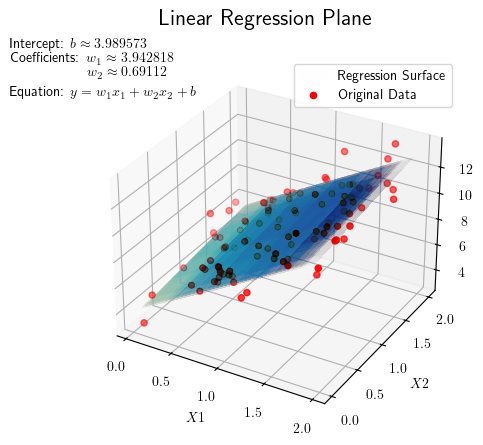

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
plt.rc('text', usetex=True)

# Generate synthetic data
np.random.seed(96)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
# np.c_ : translates slice objects to concatenation along the second axis
X_b = np.c_[X, np.ones(shape=(100, 1))]

# Find theta using the normal equation
theta_best = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_b.T, X_b)), X_b.T), y)

# Print the intercept and coefficients of the regression plane
# theta_best = [w1_best, w2_best, b_best]
[w1, w2, b] = theta_best

# define the surface function: y = x1*w1 + x2*w2 + b
def best_fit_function(x1: float, x2: float) -> float: 
    return (x1 * w1) + (x2 * w2) + b 

# generate predicted y data to plot
X1, X2 = np.meshgrid(X[:, 0], X[:, 1])
y_pred = best_fit_function(X1, X2)

# Plot the generated data and the regression plane
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# x-axis: X1
# y-axis: X2
# z-axis: y
ax.set_xlabel(r'$X1$')
ax.set_ylabel(r'$X2$')

surf = ax.plot_surface(X1, X2, y_pred, 
                       linewidth=0, 
                       cmap=cm.get_cmap('YlGnBu'), 
                       alpha=0.005, 
                       label='Regression Surface')

ax.scatter3D(X[:, 0], X[:, 1], y, label='Original Data', color='Red')

ax.legend()

fig.suptitle('Linear Regression Plane', fontsize=16)
fig.text(0.1, 0.9, fr'Intercept: $b \approx {round(b, 6)}$')
fig.text(0.1, 0.87, fr'Coefficients: $w_{1} \approx {round(theta_best[0], 6)}$')
fig.text(0.22, 0.84, fr'$w_{2} \approx {round(theta_best[1], 6)}$')
fig.text(0.1, 0.80, fr'Equation: $y = w_{1}x_{1} + w_{2}x_{2} + b$')

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

### Sigmoid Function:

$$
\sigma(z) = \frac{1}{1+e^{-z}}; \ \sigma(z) \in [0, 1]
$$

### Logistic Regression Model:

$$
\hat y = \sigma(w^Tx+b) \\
\text{where} \ \hat y = P(y = 1 \ (\text{or} \ 0) \ | \ X)
$$

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# define sigmoid function for an input z - returns a value between 
# 0 and 1 that can be used as a probabilty of belonging to a certain class
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# fix random outputs for reproducibility by specifying random seed 
np.random.seed(595)

# generate input data - shape (2, 100) means 2 rows and 100 columns
X = np.random.rand(2, 100)
w_true = np.array([1.5, -2.5])
b_true = 1.0  # True bias

# generate probabilities for each input by using the sigmoid function with
# proper inputs
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)

# if the sigmoid function returns a value between 0.5 and 1, the 
# assigned label is 1 (assigned label is 0 if the value is less than 0.5)
# since the probability calculated is P(label = 1) given the input
Y = (probabilities > 0.5).astype(int)

# introduce non-linearities into the data
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# separate the data into training and testing sets:
# Training - first 80 samples
# Testing  - remaining 20 samples
X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

# set up initial values for weights and bias terms
w = np.zeros(X.shape[0])
b = 0.0

# preset values for learning rate and number of epochs (iterations)
learning_rate = 5.95
num_epochs = 595

# run through a number of iterations in order to optimize parameters
for epoch in range(num_epochs):
    # calculate prediction probability for training samples
    # with sigmoid function
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # find gradients with respect to w and b
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    # update parameters by moving in the negative gradient direction
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

# final calculation of training probabilities using latest parameter values
# prob > 0.5 -> label = 1
# prob <= 0.5 -> label = 0
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

# calculate testing probabilities and assign according labels
A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

# calculate training and testing accuracy by counting the number of
# labels that match between actual and predicted sets and then dividing
# by the total number of samples
train_accuracy = np.mean(predictions_train == Y_train)

test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.89
Test Set Accuracy: 0.95


In [81]:
# convert the entire process into a function and run the function for 
# various values of "learning_rate" and "num_epochs" to find the 
# values which result in the best accuracies

# calculates the result of the sigmoid function with input z
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# calculates the norm of the vector (list) passed as input:
# square root of the sum of the squared elements
def norm(x: list[float]) -> float:
    return np.sqrt(sum([n**2 for n in x]))

np.random.seed(595)

X = np.random.rand(2, 100)
w_true = np.array([1.5, -2.5])
b_true = 1.0  # True bias

probabilities = sigmoid(np.dot(w_true.T, X) + b_true)

Y = (probabilities > 0.5).astype(int)

X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# X and Y only need to be calculated and separated once because these sets
# themselves don't get altered during the main process 
X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

# try each learning rate in the sequence 2, 2.5, 3, 3.5, ... , 10
learning_rates = np.arange(2, 10.5, 0.5)
# learning_rate = 5.95

# try each value for num_epochs in 100, 150, 200, ... , 1000
num_epochs_list = np.arange(100, 1050, 50)
# num_epochs = 595

total_combs = len(learning_rates) * len(num_epochs_list)

def run(learning_rate: float, num_epochs: int) -> list[
    train_accuracy: float, test_accuracy: float]:

    # reset w and b at the beginning of each use of the function
    w = np.zeros(X.shape[0])
    b = 0.0

    for epoch in range(num_epochs):
        A_train = sigmoid(np.dot(w.T, X_train) + b)

        dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
        dJdb = np.mean(A_train - Y_train)

        w -= learning_rate * dJdw
        b -= learning_rate * dJdb

    A_train = sigmoid(np.dot(w.T, X_train) + b)
    predictions_train = (A_train > 0.5).astype(int)

    A_test = sigmoid(np.dot(w.T, X_test) + b)
    predictions_test = (A_test > 0.5).astype(int)

    train_accuracy = np.mean(predictions_train == Y_train)

    test_accuracy = np.mean(predictions_test == Y_test)

    return {'metrics': [train_accuracy, test_accuracy],
            'params': [w, b]}

# count the number of iterations
curr = 0

# variables to update through the process to continuously find
# the best set of parameters / hyperparameters (learning_rate / num_epochs)
best_accuracy_norm = 0
best_accuracies = [None, None]
best_params = [None, None]
best_hyper_parems = [None, None]

# nested for loop to iterate through all combinations of learning_rate
# and num_epochs
for learning_rate in learning_rates:
    for num_epochs in num_epochs_list:
        curr += 1
        if (curr == 1 or curr == total_combs or curr % 30 == 0):
            print(f'Iteration {curr} / {total_combs}')
        # get the training/testing accuracies for this combination
        result = run(learning_rate=learning_rate, num_epochs=num_epochs)
        metrics = result['metrics']
        norm_current = norm(metrics)

        # if the current combination's accuracies give a better result 
        # than the current best, update variables
        if norm_current > best_accuracy_norm:
            best_accuracy_norm = norm_current
            best_accuracies = metrics 
            best_hyper_params = [learning_rate, num_epochs]
            best_params = result['params']

print('\n')
# print the results
train_acc_best, test_acc_best = best_accuracies 
print('Best Accuracies:')
print(f'Best Training Accuracy: {train_acc_best}')
print(f'Best Testing Accuracy: {test_acc_best}') 
print()

learning_rate_best, num_epochs_best = best_hyper_params
print('Best Hyperparameters:')
print(f'Learning Rate: {learning_rate_best}')
print(f'Num. Epochs: {num_epochs_best}')    
print() 

w_best, b_best = best_params
print('Best Values of w and b found:')
print(f'w: {w_best}')
print(f'b: {b_best}')

Iteration 1 / 323
Iteration 30 / 323
Iteration 60 / 323
Iteration 90 / 323
Iteration 120 / 323
Iteration 150 / 323
Iteration 180 / 323
Iteration 210 / 323
Iteration 240 / 323
Iteration 270 / 323
Iteration 300 / 323
Iteration 323 / 323


Best Accuracies:
Best Training Accuracy: 0.85
Best Testing Accuracy: 1.0

Best Hyperparameters:
Learning Rate: 2.0
Num. Epochs: 100

Best Values of w and b found:
w: [ 3.97799182 -6.07145777]
b: 2.4084416498676644


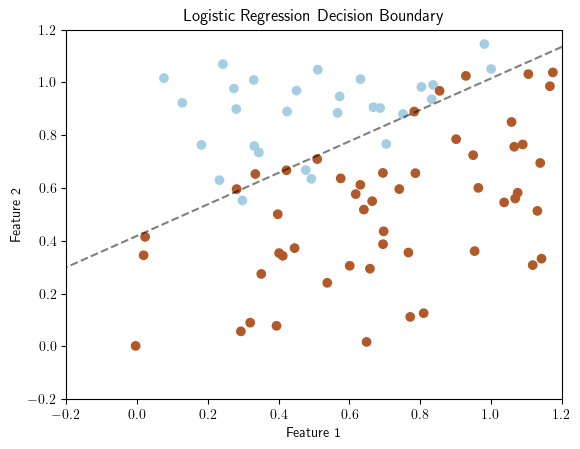

In [82]:
# plot the training data - each point is colored depending on the label
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)

# set the bounds for the x and y axes
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# convert 1D vectors into 2D arrays with np.meshgrid
# the vectors in this case are an evenly-spaced set of 50 nums: [-0.2, 1.2]
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

# xx and yy are treated as the input features (ex. X1, X2) so they are used
#   in the sigmoid function to calculate the corresponding probabilities
# ravel() function flattens a multi-dimensional array into 1D
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# plot the decision boundary to separate the majority of samples by class
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

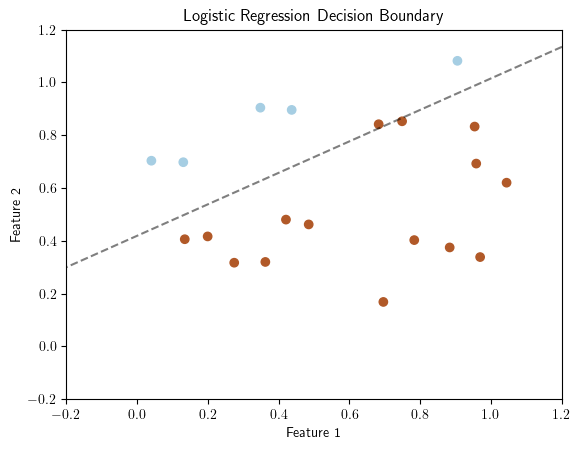

In [83]:
# repeat the above process for the testing data 

plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


 Download datasets: [train](https://drive.google.com/file/d/1I1_zbX9aqvl7FaRW1qR36R4PCL7awBlH/view?usp=drive_link), [test](https://drive.google.com/file/d/1nDk_E5crLPsmLKwq8iykS8s26Xerf_X0/view?usp=drive_link)